In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')
import random


In [2]:
full_table = pd.read_csv('source_data/included/source_1B_ED1_2A.csv',sep=',')
metG_lag = full_table.loc[(full_table['strain']=='metG') & (full_table['phase']=='lag')]
MG_lag = full_table.loc[(full_table['strain']=='MG1655') & (full_table['phase']=='lag')]
metG_stat = full_table.loc[(full_table['strain']=='metG') & (full_table['phase']=='undiluted')]
MG_stat = full_table.loc[(full_table['strain']=='MG1655') & (full_table['phase']=='undiluted')]

12
10


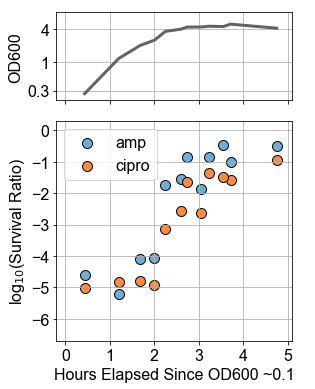

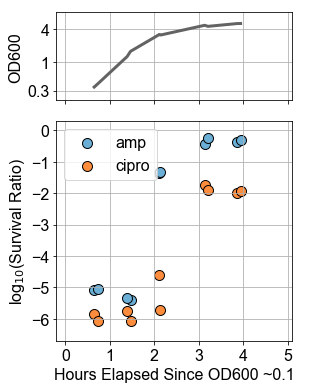

In [3]:
tables = [metG_stat,MG_stat]
file_names = ['figures/figED1a_left.pdf','figures/figED1a_right.pdf']
for t,file_name in zip(tables,file_names):
    fig,ax = plt.subplots(2, 1, figsize=(5,6),gridspec_kw={'height_ratios': [2,5]},sharey='row',sharex='col')
    ax[0].set_ylim(-0.7,0.9)
    ax[0].set_xlim(-0.2,5.1)
    ax[0].set_xticks([0,1,2,3,4,5,6])
    ax[0].set_ylabel('OD600')
    ax[0].set_yticks([np.log10(0.3),np.log10(1),np.log10(4)])
    ax[0].set_yticklabels([0.3,1,4])
    ax[0].grid(True)

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Hours Elapsed Since OD600 ~0.1')

    table = t.loc[t['time_from_OD0.1']>=0]
    table = table.loc[table['time_from_OD0.1']<20]
    table = table.sort_values('time_from_OD0.1')
    ax[0].plot(table['time_from_OD0.1'],np.log10(table['OD600']),color=cm(16),label='OD600')

    table = t.loc[t['time_from_OD0.1']<20]
    ax[1].scatter(table['time_from_OD0.1'],np.log10(table['amp']),color=cm(1),s=100,label='amp',edgecolors='black')
    ax[1].scatter(table['time_from_OD0.1'],np.log10(table['cipro']),color=cm(5),s=100,label='cipro',edgecolors='black')

    ax[0].set_axisbelow(True)
    ax[1].set_xlim(-0.2,5.1)
    ax[1].set_ylim(-6.7,0.3)
    ax[1].set_yticks(np.arange(-6,1,1))
    ax[1].set_ylabel('log$_{10}$(Survival Ratio)')
    ax[1].grid(True)
    ax[1].legend(fontsize=16)
    print(len(table))
    plt.tight_layout()
    plt.savefig(file_name)


In [4]:
metG_stat.loc[(metG_stat['time_from_OD0.1']>=0) & (metG_stat['time_from_OD0.1']<20)][['time_from_OD0.1','amp','cipro','OD600','strain','phase']].sort_values('time_from_OD0.1').to_csv('source_data/source_tables/figED1a_metG.csv')

MG_stat.loc[(MG_stat['time_from_OD0.1']>=0) & (MG_stat['time_from_OD0.1']<20)][['time_from_OD0.1','amp','cipro','OD600','strain','phase']].sort_values('time_from_OD0.1').to_csv('source_data/source_tables/figED1a_wt.csv')

10
10
7
14
14
7


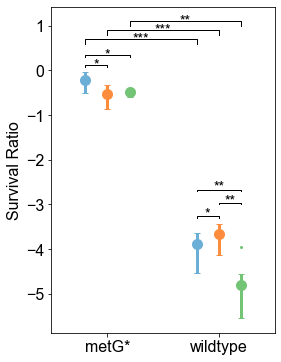

In [5]:
fig,ax = plt.subplots(figsize=(4,6))

table = metG_lag.loc[metG_lag['time_from_OD0.1']>20,'amp'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(0.8,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(1),capsize=3)

table = metG_lag.loc[metG_lag['time_from_OD0.1']>20,'cipro'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(5),capsize=3)

table = metG_lag.loc[metG_lag['time_from_OD0.1']>20,'both'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1.2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(9),capsize=3)

table = MG_lag.loc[MG_lag['time_from_OD0.1']>20,'amp'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1.8,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(1),capsize=3,label='amp')

table = MG_lag.loc[MG_lag['time_from_OD0.1']>20,'cipro'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(5),capsize=3,label='cipro')

table = MG_lag.loc[MG_lag['time_from_OD0.1']>20,'both'].dropna()
table = table.drop(40) #remove outlier to plot on its own
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(2.2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(9),capsize=3,label='amp+cipro')
table = MG_lag.loc[MG_lag['time_from_OD0.1']>20,'both'].dropna()
ax.scatter(2.2,np.log10(table[40]),s=4,color=cm(9))

ax.set_xlim(0.5,2.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['metG*','wildtype'])

x1 = 0.8
x2 = 1
y = 0.07
h = 0.05
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.15, "*", ha='center', va='bottom', color='k',size=14)
x1 = 0.8
x2 = 1.2
y = 0.3
h = 0.05
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.15, "*", ha='center', va='bottom', color='k',size=14)

x1 = 1.8
x2 = 2
y = -3.3
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.1, "*", ha='center', va='bottom', color='k',size=14)

x1 = 1.8
x2 = 2.2
y = -2.7
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.1, "**", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 2.2
y = -3
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.1, "**", ha='center', va='bottom', color='k',size=14)

x1 = 0.8
x2 = 1.8
y = 0.6
h = 0.1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.15, "***", ha='center', va='bottom', color='k',size=14)

x1 = 1
x2 = 2
y = 0.8
h = 0.1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.15, "***", ha='center', va='bottom', color='k',size=14)

x1 = 1.2
x2 = 2.2
y = 1
h = 0.1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.15, "**", ha='center', va='bottom', color='k',size=14)

ax.set_ylabel('Survival Ratio')

plt.savefig('figures/figED1b.pdf')


In [6]:
MG_lag.loc[MG_lag['time_from_OD0.1']>20,['amp','cipro','both','time_from_OD0.1','phase']].to_csv('source_data/source_tables/figED1b_wt.csv')
metG_lag.loc[metG_lag['time_from_OD0.1']>20,['amp','cipro','both','time_from_OD0.1','phase']].to_csv('source_data/source_tables/figED1b_metG.csv')

In [7]:
## check significance of above ##

metG_amp = metG_lag.loc[(metG_lag['time_from_OD0.1']>20),'amp'].dropna()
metG_cipro = metG_lag.loc[(metG_lag['time_from_OD0.1']>20),'cipro'].dropna()
metG_both = metG_lag.loc[(metG_lag['time_from_OD0.1']>20),'both'].dropna()
print(st.mannwhitneyu(metG_amp,metG_cipro))
print(st.mannwhitneyu(metG_amp,metG_both))
print(st.mannwhitneyu(metG_cipro,metG_both))

wt_amp = MG_lag.loc[(MG_lag['time_from_OD0.1']>20),'amp'].dropna()
wt_cipro = MG_lag.loc[(MG_lag['time_from_OD0.1']>20),'cipro'].dropna()
wt_both = MG_lag.loc[(MG_lag['time_from_OD0.1']>20),'both'].dropna()
print(st.mannwhitneyu(wt_amp,wt_cipro))
print(st.mannwhitneyu(wt_amp,wt_both))
print(st.mannwhitneyu(wt_cipro,wt_both))

print(st.mannwhitneyu(wt_amp,metG_amp))
print(st.mannwhitneyu(wt_cipro,metG_cipro))
print(st.mannwhitneyu(wt_both,metG_both))


MannwhitneyuResult(statistic=16.0, pvalue=0.005588184132838118)
MannwhitneyuResult(statistic=12.0, pvalue=0.013813823053463665)
MannwhitneyuResult(statistic=25.0, pvalue=0.17545165085115388)
MannwhitneyuResult(statistic=60.0, pvalue=0.04241950942586247)
MannwhitneyuResult(statistic=12.0, pvalue=0.0014939608971848279)
MannwhitneyuResult(statistic=4.0, pvalue=0.0002190591506816231)
MannwhitneyuResult(statistic=0.0, pvalue=2.3467423934790898e-05)
MannwhitneyuResult(statistic=0.0, pvalue=2.3378375260342777e-05)
MannwhitneyuResult(statistic=0.0, pvalue=0.0007228903504473763)


2
2
5
3
3
8


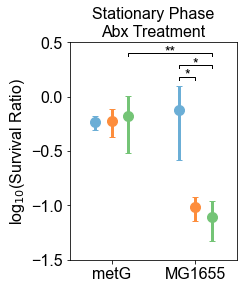

In [8]:
fig,ax = plt.subplots(figsize=(3,4))

table = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'amp'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(0.8,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(1),capsize=3)

table = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'cipro'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(5),capsize=3)

table = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'both'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1.2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(9),capsize=3)

table = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'amp'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(1.8,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(1),capsize=3,label='amp')

table = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'cipro'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(5),capsize=3,label='cipro')

table = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'both'].dropna()
print(len(table))
y_err_min = np.log10(table.mean()-table.std())
y_err_max = np.log10(table.mean()+table.std())
y_err = np.stack([[np.log10(table.mean())-y_err_min],[y_err_max-np.log10(table.mean())]])
ax.errorbar(2.2,np.log10(table.mean()),xerr=None,marker='.',markersize=20,yerr=y_err,color=cm(9),capsize=3,label='amp+cipro')

ax.set_xlim(0.5,2.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['metG','MG1655'])
ax.set_ylabel('log$_{10}$(Survival Ratio)')
ax.set_title('Stationary Phase\nAbx Treatment',size=16)
x1 = 1.8
x2 = 2
y = 0.15
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.05, "*", ha='center', va='bottom', color='k',size=14)
x1 = 1.8
x2 = 2.2
y = 0.26
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.05, "*", ha='center', va='bottom', color='k',size=14)

x1 = 1.2
x2 = 2.2
y = 0.37
h = 0.03
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.05, "**", ha='center', va='bottom', color='k',size=14)

ax.set_ylim(-1.5,0.5)

plt.savefig('figures/figED1c.pdf')


In [9]:
MG_stat.loc[MG_stat['time_from_OD0.1']>20,['amp','cipro','both','time_from_OD0.1','phase']].to_csv('source_data/source_tables/figED1c_wt.csv')
metG_stat.loc[metG_stat['time_from_OD0.1']>20,['amp','cipro','both','time_from_OD0.1','phase']].to_csv('source_data/source_tables/figED1c_metG.csv')

In [10]:
## check significance of above ##
# * < 0.05; ** < 0.005
MG = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'both'].dropna()
metG = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'both'].dropna()
print(st.mannwhitneyu(MG,metG))

MG_cip = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'cipro'].dropna()
MG_amp = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'amp'].dropna()
MG_both = MG_stat.loc[MG_stat['time_from_OD0.1']>20,'both'].dropna()
print(st.mannwhitneyu(MG_amp,MG_cip))
print(st.mannwhitneyu(MG_amp,MG_both))
print(st.mannwhitneyu(MG_cip,MG_both))

metG_cip = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'cipro'].dropna()
metG_amp = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'amp'].dropna()
metG_both = metG_stat.loc[metG_stat['time_from_OD0.1']>20,'both'].dropna()
print(st.mannwhitneyu(metG_cip,metG_amp))
print(st.mannwhitneyu(metG_amp,metG_both))
print(st.mannwhitneyu(metG_cip,metG_both))

MannwhitneyuResult(statistic=1.5, pvalue=0.004162984111597198)
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=0.0, pvalue=0.00945177150556067)
MannwhitneyuResult(statistic=9.0, pvalue=0.30491702183672975)
MannwhitneyuResult(statistic=2.0, pvalue=0.34926767915166934)
MannwhitneyuResult(statistic=3.0, pvalue=0.2806379180672889)
MannwhitneyuResult(statistic=4.0, pvalue=0.4232252984382953)


MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)


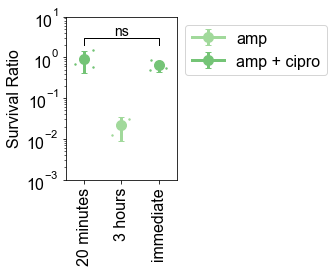

In [11]:
np.random.seed(5)
survival_20min = pd.Series([1.512820513,0.682539683,0.586206897]) ## amp + cipro, from 20230829
survival_4hr = pd.Series([3/99,0.6/48]) ## amp, from 20230915 and 20230911 (direct from CFU, not in spreadsheet)
survival_imm = pd.Series([0.857142857,0.490196078,0.548148148]) ## amp + cipro, from 20230829
cm = plt.cm.get_cmap('tab20c')
fig,ax = plt.subplots(figsize=(2,3))
i=0

y1 = survival_20min
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0]*len(y1),l)],y1,s=2,color=cm(9))
ax.errorbar(0,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(9),capsize=3)

y2 = survival_4hr
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([1]*len(y2),l)],y2,s=2,color=cm(10))
ax.errorbar(1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(10),capsize=3,label='amp')

y3 = survival_imm
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y3))]
ax.scatter([x+y for x,y in zip([2]*len(y3),l)],y3,s=2,color=cm(9))
ax.errorbar(2,y3.mean(),xerr=None,marker='.',markersize=20,yerr=y3.std(),color=cm(9),capsize=3,label='amp + cipro')


ax.legend(bbox_to_anchor=(1, 1))
ax.set_yscale('log')
ax.set_ylim(10**(-3),10)
ax.set_xlim(-0.5,2.5)
ax.set_ylabel('Survival Ratio',size=16)

print(st.mannwhitneyu(survival_imm,survival_20min))

x1 = 0
x2 = 2
y = 2
h = 1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

ax.set_xticks([0,1,2])
ax.set_xticklabels(['20 minutes','3 hours','immediate'],rotation=90)

plt.savefig('figures/figED1j_survival.pdf')

In [12]:
## save principal component loadings for iPAGE (for fig ED1o) ##
## run iPAGE in discrete mode; max_p=0.001; independence=0
bnum_table = pd.read_csv('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t',index_col=0)
bnum_table = bnum_table.drop_duplicates()
bnum_table.index = bnum_table['gene']
PC_table = pd.read_csv('source_data/generated/atlas_PCA_loadings.txt',sep='\t',index_col=0) # saved in figureED1_R notebook
PC_table['bnum'] = bnum_table['bnum']
PC_table['gene'] = PC_table.index
PC_table.index = PC_table['bnum']
for PC in ['PC_1','PC_2']:
    table = pd.DataFrame(PC_table.loc[:,PC]).sort_values(PC)
    table = table.loc[abs(table[PC])>0.025]
    table = pd.DataFrame(table[PC]>0.025).astype(int)
    table.to_csv('source_data/generated/atlas_' + PC + '_loadings_discrete.txt',sep='\t')


In [13]:
## save cluster markers for iPAGE (for fig ED1q, ED1s-u)##

def save_ipage_for_fig1(id1,id2,FDR):
    filename = 'source_data/generated/v2_clust' + id1 + '_vs_' + id2 + '_markers_for_fig1.txt' # saved in fig1_markers.R
    table = pd.read_csv(filename,sep='\t',index_col=0)
    table.index = table['Row.names']
    table = table.drop('Row.names',axis=1)
    table = table.merge(bnum_table,left_index=True,right_index=True)
    table.index = table['bnum']
    table['less'] = -table['less']
    signed_p = []
    for h,l in zip(table['greater'],table['less']):
        if abs(h)<=abs(l):
            signed_p.append(h + (10**-300))
        elif abs(l)<abs(h):
            signed_p.append(l - (10**-300))
        else:
            print('error')
    table['signed_p'] = signed_p
    table['fixed_signif'] = (abs(table['signed_p']).sort_values()<FDR*np.arange(1,len(table)+1)/len(table)).astype(int)
    table['fixed_signif'] = (table['fixed_signif'] * (table['signed_p']/abs(table['signed_p']))).astype(int)
    output = 'source_data/generated/ipageInput_fig1_clust' + id1 + '_vs_' + id2 + '_FDR_' + str(FDR) + '_markers_for_fig1.txt'
    (table['fixed_signif']+1).sort_values().to_csv(output,sep='\t')

FDR = 0.01
save_ipage_for_fig1('2','1',FDR)
save_ipage_for_fig1('2','3',FDR)
save_ipage_for_fig1('2','4',FDR)
save_ipage_for_fig1('2','5',FDR)
save_ipage_for_fig1('3','1',FDR)
save_ipage_for_fig1('3','4',FDR)
save_ipage_for_fig1('3','2',FDR)
save_ipage_for_fig1('3','5',FDR)



In [14]:
## read in aggregated iPAGE output ## 
## run ipage P.05 ##
combined = pd.read_csv('source_data/included/ipageInput_fig1_pvmatrix_combined.txt',sep='\t',index_col=0)
## clean up dataframe and make parsable ##
combined['comparison'] = combined.index.str.split('_FDR_0.01_markers_for_fig1.txt_',expand=True).droplevel(1).str.replace('ipageInput_fig1_','')
combined['type'] = combined.index.str.split('_PO_',expand=True).droplevel(0).str.split('_P.05_PAGE',expand=True).droplevel(1)
combined = combined.reset_index().drop('index',axis=1)
for column in ['0','1','2']:
    combined = combined.merge(combined[column].str.split('/',expand=True).rename(columns={0:column+'_pval_enriched',1:column+'_pval_depleted'}).astype(float),left_index=True,right_index=True)
combined = combined.drop(['0','1','2'],axis=1)
## resulting combined dataframe gives p-value (from iPAGE) of enrichment or depletion in each gene classification ##
## gene classifications are 0 (significantly underexpressed), 1 (not differentially expressed), 2 (significantly overexpressed) ##


In [15]:
## find terms significantly upregulated in cluster 2 (persister) vs. cluster 1 (stationary) and cluster 4 (late lag) ##
pval_threshold = np.log10(0.002)
clust2_count = combined.loc[combined['comparison'].str.contains('clust2_vs_5|clust2_vs_4|clust2_vs_1') & (combined['2_pval_enriched']<pval_threshold) & (combined['0_pval_enriched']>pval_threshold)].groupby('GO')['comparison'].count()

genes_df = pd.DataFrame()
for term in clust2_count[clust2_count==3].index:
    term = term.split(' ')[0]
    genes = []
    for term_type in ['go','tf','sr']:
        ref_file = open('source_data/included/Ecoli_' + term_type + '_index.txt')
        for line in ref_file:
            if term in line:
                genes.append(line.split('\t')[0])
    genes_df = genes_df.merge(pd.DataFrame([1]*len(genes),genes,columns=[term]),left_index=True,right_index=True,how='outer')
genes_df = genes_df.fillna(0)
genes_df.sum()[genes_df.sum()>4]

## PspF_Up shown in Fig. ED1q


PspF_Up    6
dtype: int64

In [16]:
## find terms significantly upregulated in cluster 3 (lag) vs. cluster 1 (stationary) and cluster 4 (late lag) and cluster 5 (exponential) ##
pval_threshold = np.log10(0.002)
clust3_count = combined.loc[combined['comparison'].str.contains('clust3_vs_5|clust3_vs_4|clust3_vs_1') & (combined['2_pval_enriched']<pval_threshold) & (combined['0_pval_enriched']>pval_threshold)].groupby('GO')['comparison'].count()

genes_df = pd.DataFrame()
for term in clust3_count[clust3_count==3].index:
    full_term = term
    term = term.split(' ')[0]
    genes = []
    for term_type in ['go','tf','sr']:
        ref_file = open('source_data/included/Ecoli_' + term_type + '_index.txt')
        for line in ref_file:
            if term in line:
                genes.append(line.split('\t')[0])
    genes_df = genes_df.merge(pd.DataFrame([1]*len(genes),genes,columns=[full_term]),left_index=True,right_index=True,how='outer')
genes_df = genes_df.fillna(0)
genes_df = genes_df.loc[:,genes_df.sum()[genes_df.sum()>4].index]
genes_df.sum()

Fur_Down Fur_Down                               66.0
GO:0006811 ion transport                        97.0
GO:0006826 iron ion transport                   36.0
GO:0015198 oligopeptide transporter activity    17.0
GO:0015891 siderophore transport                 6.0
GlcC_Up GlcC_Up                                  6.0
IscR_Up IscR_Up                                  7.0
OxyR_Up OxyR_Up                                 16.0
oxReU oxyR Regulon Upregulated                  12.0
dtype: float64

In [17]:
## select pathways that capture at least 30% of genes in any overlapping non-reported pathways
## and that are more than one operon 

included_pathway_indexes = [0,3,7] # indexes for Fur_Down, oligopeptide transporter activity, OxyR_Up
df = pd.DataFrame()
for i in included_pathway_indexes:
    temp_df = pd.DataFrame(genes_df.loc[genes_df.iloc[:,i]>0].sum()/genes_df.sum(),columns=[genes_df.columns[i]])
    df = df.merge(temp_df,how='outer',left_index=True,right_index=True)
df.max(axis=1).sort_values()

## oxyR_Up, Fur_Down, oligopeptide transporter activity shown in Fig. ED1s-u
## GlcC_Up is only one operon so not shown

GlcC_Up GlcC_Up                                 0.000000
GO:0006811 ion transport                        0.309278
oxReU oxyR Regulon Upregulated                  0.666667
GO:0006826 iron ion transport                   0.833333
IscR_Up IscR_Up                                 0.857143
Fur_Down Fur_Down                               1.000000
GO:0015198 oligopeptide transporter activity    1.000000
GO:0015891 siderophore transport                1.000000
OxyR_Up OxyR_Up                                 1.000000
dtype: float64

In [18]:
combined.loc[combined['GO'].str.contains('GO:0015198') & combined['comparison'].str.contains('clust3_')]

,GO,comparison,type,0_pval_enriched,0_pval_depleted,1_pval_enriched,1_pval_depleted,2_pval_enriched,2_pval_depleted
8,GO:0015198 oligopeptide transporter activity,clust3_vs_2,go,0.00,-1.175,-0.000,-3.547,-6.598,-0.0
387,GO:0015198 oligopeptide transporter activity,clust3_vs_1,go,0.00,-1.769,-0.013,-1.100,-3.465,-0.0
907,GO:0015198 oligopeptide transporter activity,clust3_vs_4,go,-0.00,-0.668,-0.003,-1.625,-2.763,-0.0
1607,GO:0015198 oligopeptide transporter activity,clust3_vs_5,go,-0.02,-0.710,-0.001,-2.145,-4.118,-0.0
